In [1]:
import numpy as np
import os
import ephem as ep
import statistics as stat
import healpy as hp
from pygdsm import GlobalSkyModel2016
from pygdsm import GlobalSkyModel
import scipy as sci
#import read_vna_csv as cs
from matplotlib import pyplot as plt
import PrizmCalibration as cl
import prizmatoid as pzt
try:
    reload(pzt)
    reload(cl)
except:
    from importlib import reload
    reload(pzt)
    reload(cl)
    

# Loading, binning and shifting the antenna data

In [2]:
%store -r

In [2]:
T = T50150

In [4]:
#flags times when RFI is present and replaces the value with closest time when RFI not present
day1filtered = cl.rfi_remove(p0a, 200, 20)
day2filtered = cl.rfi_remove(p0ba, 200, 20)
day3filtered = cl.rfi_remove(p0bb, 200, 20)
day4filtered = cl.rfi_remove(p0ca, 200, 20)
day5filtered = cl.rfi_remove(p0cb, 200, 20)
day6filtered = cl.rfi_remove(p0da, 200, 20)
day7filtered = cl.rfi_remove(p0db, 200, 20)
day8filtered = cl.rfi_remove(p0dc, 200, 20)
day9filtered = cl.rfi_remove(p0dd, 200, 20)
day10filtered = cl.rfi_remove(p0e, 200, 20)
day11afiltered = cl.rfi_remove(p0faa, 200, 20)
day11bfiltered = cl.rfi_remove(p0fab, 200, 20)
day12filtered = cl.rfi_remove(p0fb, 200, 20)
day13afiltered = cl.rfi_remove(p0fca, 200, 20)
day13bfiltered = cl.rfi_remove(p0fcb, 200, 20)
day14afiltered = cl.rfi_remove(p0fda, 200, 20)
day14bfiltered = cl.rfi_remove(p0fdb, 200, 20)
day15afiltered = cl.rfi_remove(p0fea, 200, 20)
day15bfiltered = cl.rfi_remove(p0feb, 200, 20)
day16afiltered = cl.rfi_remove(p0ffa, 200, 20)
day17afiltered = cl.rfi_remove(p0fga, 200, 20)
day17bfiltered = cl.rfi_remove(p0fgb, 200, 20)
day18afiltered = cl.rfi_remove(p0fha, 200, 20)
day19afiltered = cl.rfi_remove(p0fia, 200, 20)
day19bfiltered = cl.rfi_remove(p0fib, 200, 20)

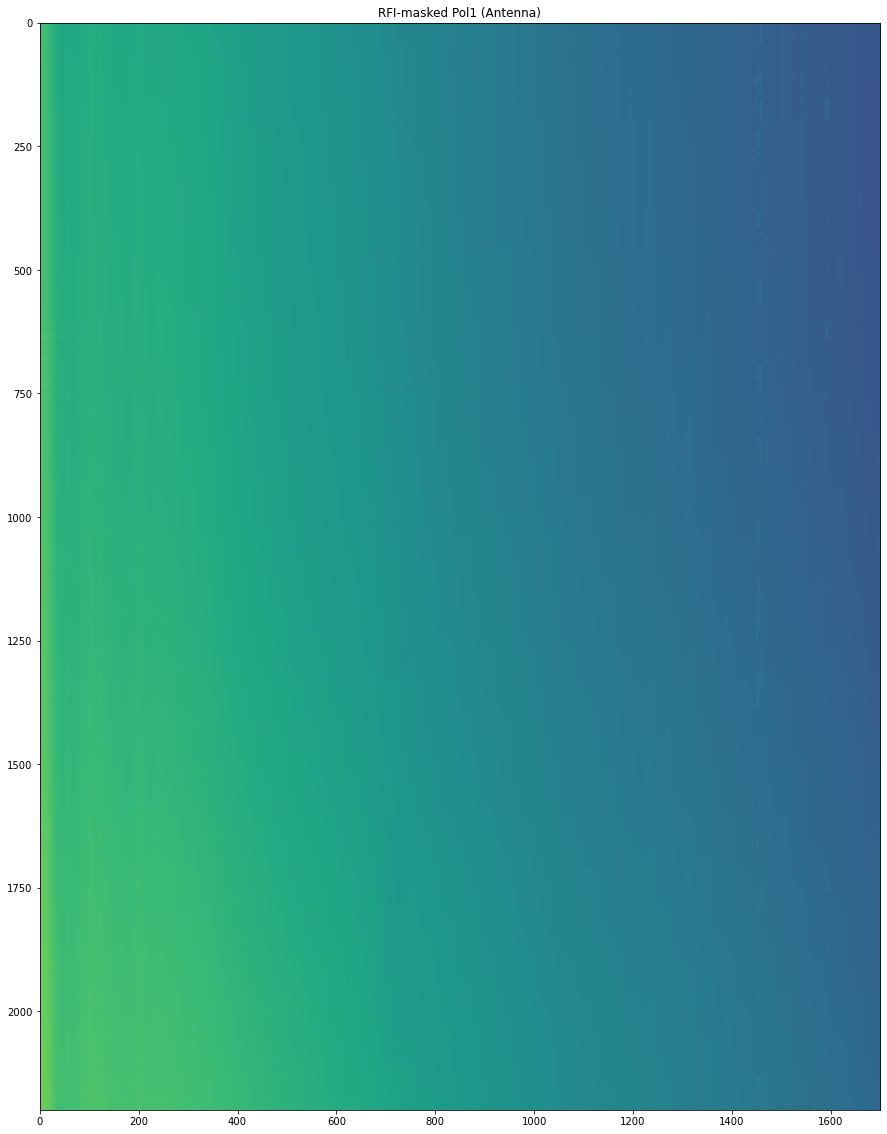

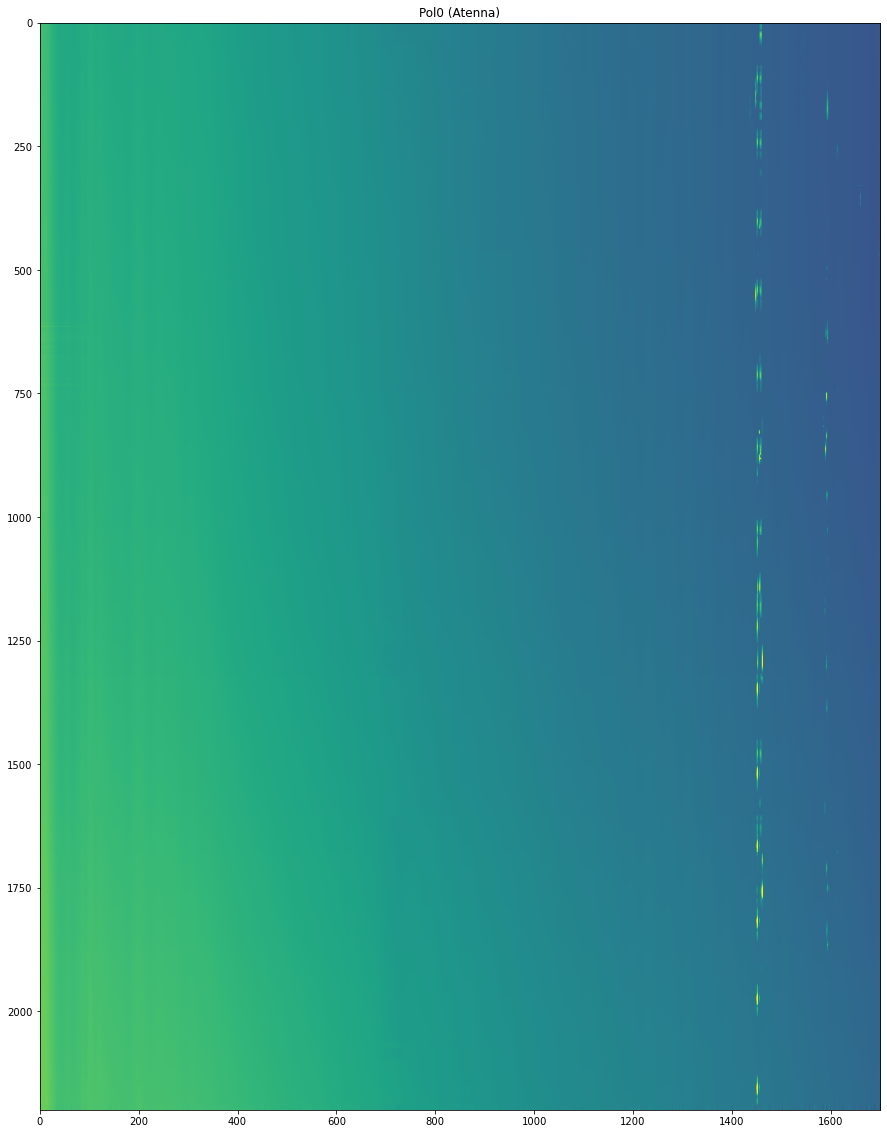

In [5]:
#see results of rfi_remove
plt.figure(1, figsize=(20, 20))
plt.title('RFI-masked Pol1 (Antenna)')
plt.imshow(np.log10(day9filtered[:,800:2500]), vmin=7, vmax=10)
#plt.xlim([2200,2300])
#plt.ylim([1900,2000])

# Plots the 'antenna.scio' mode for the polarization channel 'Pol1' on a logarithmic color scale.
plt.figure(2, figsize=(20, 20))
plt.title('Pol0 (Atenna)')
plt.imshow(np.log10(p0dd[:,800:2500]), vmin=7, vmax=10)
#plt.xlim([819,2458])

In [6]:
#this function takes the antenna data and sorts it into bins of 'minperbin' minutes 
#set to 2 minutes but can change this to any value that produces an integer when you divide 1440/minperbin
minperbin = 2
day1 = cl.antenna_time_binning(minperbin, day1filtered,  time1)
day2 = cl.antenna_time_binning(minperbin, day2filtered, time2a)
day3 = cl.antenna_time_binning(minperbin, day3filtered, time2b)
day4 = cl.antenna_time_binning(minperbin, day4filtered,  time3a)
day5 = cl.antenna_time_binning(minperbin, day5filtered, time3b)
day6 = cl.antenna_time_binning(minperbin, day6filtered, time4a)
day7 = cl.antenna_time_binning(minperbin, day7filtered, time4b)
day8 = cl.antenna_time_binning(minperbin, day8filtered, time4c)
day9 = cl.antenna_time_binning(minperbin, day9filtered, time4d)
day10 = cl.antenna_time_binning(minperbin, day10filtered, time5new)
day11a = cl.antenna_time_binning(minperbin, day11afiltered, time6aa)
day11b = cl.antenna_time_binning(minperbin, day11bfiltered, time6ab)
day12 = cl.antenna_time_binning(minperbin, day12filtered, time6b)
day13a = cl.antenna_time_binning(minperbin, day13afiltered, time6ca)
day13b = cl.antenna_time_binning(minperbin, day13bfiltered, time6cb)
day14a = cl.antenna_time_binning(minperbin, day14afiltered, time6da)
day14b = cl.antenna_time_binning(minperbin, day14bfiltered, time6db)
day15a = cl.antenna_time_binning(minperbin, day15afiltered, time6ea)
day15b = cl.antenna_time_binning(minperbin, day15bfiltered, time6eb)
day16a = cl.antenna_time_binning(minperbin, day16afiltered, time6fa)
day17a = cl.antenna_time_binning(minperbin, day17afiltered, time6ga)
day17b = cl.antenna_time_binning(minperbin, day17bfiltered, time6gb)
day18a = cl.antenna_time_binning(minperbin, day18afiltered, time6ha)
day19a = cl.antenna_time_binning(minperbin, day19afiltered, time6ia)
day19b = cl.antenna_time_binning(minperbin, day19bfiltered, time6ib)

In [7]:
#this function actually rearranges the data based on the offset determined above and adds zeros at the times where no data exists
day1shift = cl.day_shift_align(minperbin, day1, offset1)
day2shift = cl.day_shift_align(minperbin, day2, offset2a)
day3shift = cl.day_shift_align(minperbin, day3, offset2b)
day4shift = cl.day_shift_align(minperbin, day4, offset3a)
day5shift = cl.day_shift_align(minperbin, day5, offset3b)
day6shift = cl.day_shift_align(minperbin, day6, offset4a)
day7shift = cl.day_shift_align(minperbin, day7, offset4b)
day8shift = cl.day_shift_align(minperbin, day8, offset4c)
day9shift = cl.day_shift_align(minperbin, day9, offset4d)
day10shift = cl.day_shift_align(minperbin, day10, offset5)
day11ashift = cl.day_shift_align(minperbin, day11a, offset6aa)
day11bshift = cl.day_shift_align(minperbin, day11b, offset6ab)
day12shift = cl.day_shift_align(minperbin, day12, offset6b)
day13ashift = cl.day_shift_align(minperbin, day13a, offset6ca)
day13bshift = cl.day_shift_align(minperbin, day13b, offset6cb)
day14ashift = cl.day_shift_align(minperbin, day14a, offset6da)
day14bshift = cl.day_shift_align(minperbin, day14b, offset6db)
day15ashift = cl.day_shift_align(minperbin, day15a, offset6ea)
day15bshift = cl.day_shift_align(minperbin, day15b, offset6eb)
day16ashift = cl.day_shift_align(minperbin, day16a, offset6fa)
day17ashift = cl.day_shift_align(minperbin, day17a, offset6ga)
day17bshift = cl.day_shift_align(minperbin, day17b, offset6gb)
day18ashift = cl.day_shift_align(minperbin, day18a, offset6ha)
day19ashift = cl.day_shift_align(minperbin, day19a, offset6ia)
day19bshift = cl.day_shift_align(minperbin, day19b, offset6ib)

([<matplotlib.axis.XTick at 0x136f1edd0>,
 [Text(0, 0, '0'),
  Text(100, 0, '200'),
  Text(200, 0, '400'),
  Text(300, 0, '600'),
  Text(400, 0, '800'),
  Text(500, 0, '1000'),
  Text(600, 0, '1200'),
  Text(700, 0, '1400')])

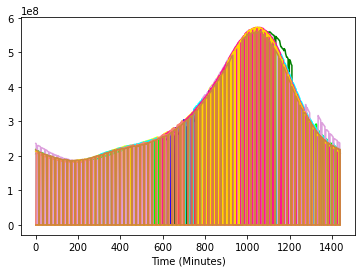

In [8]:
#use this to see that the shifting worked
plt.plot(day1shift[:,1600], color='black', label ='100 MHz, Day 1')
plt.plot(day2shift[:,1600], color='purple', label ='100 MHz, Day 2')
plt.plot(day3shift[:,1600], color='pink', label = '100 MHz, Day 3')
plt.plot(day4shift[:,1600], color='teal', label = '100 MHz, Day 4')
plt.plot(day5shift[:,1600], color='yellow', label ='100 MHz, Day 5')
plt.plot(day6shift[:,1600], color='orange', label ='100 MHz, Day 6')
plt.plot(day7shift[:,1600], color='green', label = '100 MHz, Day 7')
plt.plot(day8shift[:,1600], color='red', label = '100 MHz, Day 8')
plt.plot(day9shift[:,1600], color='blue', label = '100 MHz, Day 9')
plt.plot(day10shift[:,1600], color='grey', label = '100 MHz, Day 10')
plt.plot(day11ashift[:,1600], color='silver', label = '100 MHz, Day 11')
plt.plot(day11bshift[:,1600], color='silver', label = '100 MHz, Day 11')
plt.plot(day12shift[:,1600], color='rosybrown', label = '100 MHz, Day 12')
plt.plot(day13ashift[:,1600], color='lime', label = '100 MHz, Day 13')
plt.plot(day13bshift[:,1600], color='lime', label = '100 MHz, Day 13')
plt.plot(day14ashift[:,1600], color='cyan', label = '100 MHz, Day 14')
plt.plot(day14bshift[:,1600], color='cyan', label = '100 MHz, Day 14')
plt.plot(day15ashift[:,1600], color='plum', label = '100 MHz, Day 15')
plt.plot(day15bshift[:,1600], color='plum', label = '100 MHz, Day 15')
plt.plot(day16ashift[:,1600], color='deeppink', label = '100 MHz, Day 16')
plt.plot(day17ashift[:,1600], color='gold', label = '100 MHz, Day 17')
plt.plot(day17bshift[:,1600], color='gold', label = '100 MHz, Day 17')
plt.plot(day18ashift[:,1600], color='salmon', label = '100 MHz, Day 18')
plt.plot(day19ashift[:,1600], color='peru', label = '100 MHz, Day 19')
plt.plot(day19bshift[:,1600], color='peru', label = '100 MHz, Day 19')
plt.xlabel('Time (Minutes)')
labels=(["0", "200", "400", "600", "800", "1000", "1200", "1400" ])
plt.xticks([0,100,200,300, 400, 500, 600, 700], labels)
#plt.xlim([50000000, 150000000])
#plt.xlim([0,50])
#plt.xlim([219,383])
#plt.ylim([7.5,9.5])

In [8]:
#this function averages the antenna data over 2MHz bins to match the GSM data
#the first input is the lowest frequency and the second input is the highest frequency
flow=50
fhigh=150
A1 = cl.freq_binning(flow, fhigh, day1shift)
A2 = cl.freq_binning(flow, fhigh, day2shift)
A3 = cl.freq_binning(flow, fhigh, day3shift)
A4 = cl.freq_binning(flow, fhigh, day4shift)
A5 = cl.freq_binning(flow, fhigh, day5shift)
A6 = cl.freq_binning(flow, fhigh, day6shift)
A7 = cl.freq_binning(flow, fhigh, day7shift)
A8 = cl.freq_binning(flow, fhigh, day8shift)
A9 = cl.freq_binning(flow, fhigh, day9shift)
A10 = cl.freq_binning(flow, fhigh, day10shift)
A11a = cl.freq_binning(flow, fhigh, day11ashift)
A11b = cl.freq_binning(flow, fhigh, day11bshift)
A12 = cl.freq_binning(flow, fhigh, day12shift)
A13a = cl.freq_binning(flow, fhigh, day13ashift)
A13b = cl.freq_binning(flow, fhigh, day13bshift)
A14a = cl.freq_binning(flow, fhigh, day14ashift)
A14b = cl.freq_binning(flow, fhigh, day14bshift)
A15a = cl.freq_binning(flow, fhigh, day15ashift)
A15b = cl.freq_binning(flow, fhigh, day15bshift)
A16a = cl.freq_binning(flow, fhigh, day16ashift)
A17a = cl.freq_binning(flow, fhigh, day17ashift)
A17b = cl.freq_binning(flow, fhigh, day17bshift)
A18a = cl.freq_binning(flow, fhigh, day18ashift)
A19a = cl.freq_binning(flow, fhigh, day19ashift)
A19b = cl.freq_binning(flow, fhigh, day19bshift)

# Setting up the GSM temperatures

In [15]:
#get the beam simulation and turn into a healpy array
beam_dict = pzt.read_beam(dir_parent='/Users/kellyforan/Documents/Prizm/Data/beam_100MHz',
                     file_name='results_pattern_100mhz_total90.dat')

In [35]:
healpy_beam = pzt.healpy_beam(beam_dict)

In [37]:
#takes about 10 minutes but could be sped up by loading and saving GSM maps first
T = cl.get_GSM_temps(healpy_beam, flow, fhigh, minperbin)

# Aligning the GSM temperature data and antenna data and adding zeros to match antenna

In [9]:
#this function aligns the GSM data with the antenna data (in time)
#the inputs are the minutes per bin and the GSM temperature data
Tgsm = cl.align_GSMdata(minperbin, T)

In [10]:
Tgsm1 = cl.GSM_add_zeros(Tgsm, day1shift, minperbin)
Tgsm2 = cl.GSM_add_zeros(Tgsm, day2shift, minperbin)
Tgsm3 = cl.GSM_add_zeros(Tgsm, day3shift, minperbin)
Tgsm4 = cl.GSM_add_zeros(Tgsm, day4shift, minperbin)
Tgsm5 = cl.GSM_add_zeros(Tgsm, day5shift, minperbin)
Tgsm6 = cl.GSM_add_zeros(Tgsm, day6shift, minperbin )
Tgsm7 = cl.GSM_add_zeros(Tgsm, day7shift, minperbin)
Tgsm8 = cl.GSM_add_zeros(Tgsm, day8shift, minperbin)
Tgsm9 = cl.GSM_add_zeros(Tgsm, day9shift, minperbin)
Tgsm10 = cl.GSM_add_zeros(Tgsm, day10shift, minperbin)
Tgsm11a = cl.GSM_add_zeros(Tgsm, day11ashift, minperbin)
Tgsm11b = cl.GSM_add_zeros(Tgsm, day11bshift, minperbin)
Tgsm12 = cl.GSM_add_zeros(Tgsm, day12shift, minperbin)
Tgsm13a = cl.GSM_add_zeros(Tgsm, day13ashift, minperbin)
Tgsm13b = cl.GSM_add_zeros(Tgsm, day13bshift, minperbin)
Tgsm14a = cl.GSM_add_zeros(Tgsm, day14ashift, minperbin)
Tgsm14b = cl.GSM_add_zeros(Tgsm, day14bshift, minperbin)
Tgsm15a = cl.GSM_add_zeros(Tgsm, day15ashift, minperbin)
Tgsm15b = cl.GSM_add_zeros(Tgsm, day15bshift, minperbin)
Tgsm16a = cl.GSM_add_zeros(Tgsm, day16ashift, minperbin)
Tgsm17a = cl.GSM_add_zeros(Tgsm, day17ashift, minperbin)
Tgsm17b = cl.GSM_add_zeros(Tgsm, day17bshift, minperbin)
Tgsm18a = cl.GSM_add_zeros(Tgsm, day18ashift, minperbin)
Tgsm19a = cl.GSM_add_zeros(Tgsm, day19ashift, minperbin)
Tgsm19b = cl.GSM_add_zeros(Tgsm, day19bshift, minperbin)

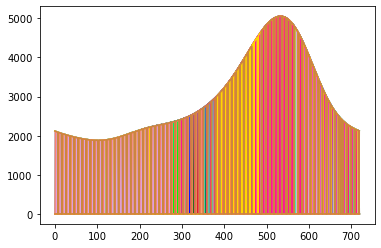

In [15]:
plt.plot(Tgsm1[:,10], color = 'black')
plt.plot(Tgsm2[:,10], color='purple')
plt.plot(Tgsm3[:,10], color='pink')
plt.plot(Tgsm4[:,10], color='teal')
plt.plot(Tgsm5[:,10], color='yellow')
plt.plot(Tgsm6[:,10], color='orange')
plt.plot(Tgsm7[:,10], color='green')
plt.plot(Tgsm8[:,10], color='red')
plt.plot(Tgsm9[:,10], color='blue')
plt.plot(Tgsm10[:,10], color='grey')
plt.plot(Tgsm11a[:,10], color='silver')
plt.plot(Tgsm11b[:,10], color='silver')
plt.plot(Tgsm12[:,10], color='rosybrown')
plt.plot(Tgsm13a[:,10], color='lime')
plt.plot(Tgsm13b[:,10], color='lime')
plt.plot(Tgsm14a[:,10], color='cyan')
plt.plot(Tgsm14b[:,10], color='cyan')
plt.plot(Tgsm15a[:,10], color='plum')
plt.plot(Tgsm15b[:,10], color='plum')
plt.plot(Tgsm16a[:,10], color='deeppink')
plt.plot(Tgsm17a[:,10], color='gold')
plt.plot(Tgsm17b[:,10], color='gold')
plt.plot(Tgsm18a[:,10], color='salmon')
plt.plot(Tgsm19a[:,10], color='peru')
plt.plot(Tgsm19b[:,10], color='peru')

# Calibration (differences method)

In [16]:
poly= 3
y1, obsavg1, k1, fit1 = cl.sky_model(Tgsm1, A1, minperbin, poly, 50, 150)
y2, obsavg2, k2, fit2 = cl.sky_model(Tgsm2, A2, minperbin, poly, 50, 150)
y3, obsavg3, k3, fit3 = cl.sky_model(Tgsm3, A3, minperbin, poly, 50, 150)
y4, obsavg4, k4, fit4 = cl.sky_model(Tgsm4, A4, minperbin, poly, 50, 150)
y5, obsavg5, k5, fit5 = cl.sky_model(Tgsm5, A5, minperbin, poly, 50, 150)
y6, obsavg6, k6, fit6 = cl.sky_model(Tgsm6, A6, minperbin, poly, 50, 150)
y7, obsavg7, k7, fit7 = cl.sky_model(Tgsm7, A7, minperbin, poly, 50, 150)
y8, obsavg8, k8, fit8 = cl.sky_model(Tgsm8, A8, minperbin, poly, 50, 150)
y9, obsavg9, k9, fit9 = cl.sky_model(Tgsm9, A9, minperbin, poly, 50, 150)
y10, obsavg10, k10, fit10 = cl.sky_model(Tgsm10, A10, minperbin, poly, 50, 150)
y11a, obsavg11a, k11a, fit11a = cl.sky_model(Tgsm11a, A11a, minperbin, poly, 50, 150)
y11b, obsavg11b, k11b, fit11b = cl.sky_model(Tgsm11b, A11b, minperbin, poly, 50, 150)
y12, obsavg12, k12, fit12 = cl.sky_model(Tgsm12, A12, minperbin, poly, 50, 150)
y13a, obsavg13a, k13a, fit13a = cl.sky_model(Tgsm13a, A13a, minperbin, poly, 50, 150)
y13b, obsavg13b, k13b, fit13b = cl.sky_model(Tgsm13b, A13b, minperbin, poly, 50, 150)
y14a, obsavg14a, k14a, fit14a = cl.sky_model(Tgsm14a, A14a, minperbin, poly, 50, 150)
y14b, obsavg14b, k14b, fit14b = cl.sky_model(Tgsm14b, A14b, minperbin, poly, 50, 150)
y15a, obsavg15a, k15a, fit15a = cl.sky_model(Tgsm15a, A15a, minperbin, poly, 50, 150)
y15b, obsavg15b, k15b, fit15b = cl.sky_model(Tgsm15b, A15b, minperbin, poly, 50, 150)
y16a, obsavg16a, k16a, fit16a = cl.sky_model(Tgsm16a, A16a, minperbin, poly, 50, 150)
y17a, obsavg17a, k17a, fit17a = cl.sky_model(Tgsm17a, A17a, minperbin, poly, 50, 150)
y17b, obsavg17b, k17b, fit17b = cl.sky_model(Tgsm17b, A17b, minperbin, poly, 50, 150)
y18a, obsavg18a, k18a, fit18a = cl.sky_model(Tgsm18a, A18a, minperbin, poly, 50, 150)
y19a, obsavg19a, k19a, fit19a = cl.sky_model(Tgsm19a, A19a, minperbin, poly, 50, 150)
y19b, obsavg19b, k19b, fit19b = cl.sky_model(Tgsm19b, A19b, minperbin, poly, 50, 150)

([<matplotlib.axis.XTick at 0x21b7de050>,
 [Text(0, 0, '60'),
  Text(10, 0, '80'),
  Text(20, 0, '100'),
  Text(30, 0, '120'),
  Text(40, 0, '140'),
  Text(50, 0, '160')])

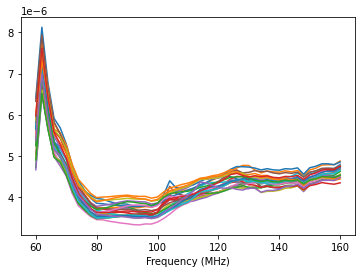

In [17]:
plt.plot(k1)
plt.plot(k2)
plt.plot(k3)
plt.plot(k4)
plt.plot(k5)
plt.plot(k6)
plt.plot(k7)
plt.plot(k8)
plt.plot(k9)
plt.plot(k10)
plt.plot(k11a)
plt.plot(k11b)
plt.plot(k12)
plt.plot(k13a)
plt.plot(k13b)
plt.plot(k14a)
plt.plot(k14b)
plt.plot(k15a)
plt.plot(k15b)
plt.plot(k16a)
plt.plot(k17a)
plt.plot(k17b)
plt.plot(k18a)
plt.plot(k19a)
plt.plot(k19b)
plt.xlabel('Frequency (MHz)')
labels=(["60", "80", "100", "120", "140", "160"])
plt.xticks([0,10, 20, 30, 40, 50], labels)

In [18]:
obsaveragetotal = (obsavg1 + obsavg2 + obsavg3 + obsavg4 + obsavg5 + obsavg6 + obsavg7 + obsavg8 + obsavg9 + obsavg10 + obsavg12 + obsavg11a  + obsavg11b +  obsavg13a + obsavg13b + obsavg14a+ obsavg14b + obsavg15a + obsavg15b + obsavg16a + obsavg17a + obsavg17b + obsavg18a + obsavg19a + obsavg19b)/25
yavg = (y1+ y2 + y3 + y4 + y5 + y6 + y7 + y8 + y9 + y10 + y12 + y11a + y11b + y13a + y13b + y14a + y14b + y15a + y15b + y16a + y17a + y17b + y18a + y19a + y19b)/25


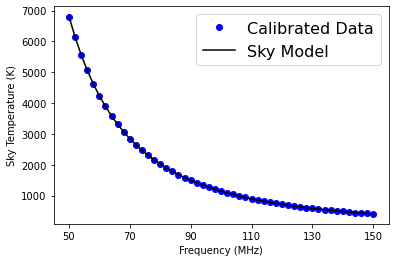

In [19]:
plt.plot(obsaveragetotal, 'o', color='blue', label = 'Calibrated Data')
plt.plot(yavg, color ='black', label= 'Sky Model')
plt.ylabel('Sky Temperature (K)')
plt.xlabel('Frequency (MHz)')
labels=(["50", "70", "90", "110", "130", "150"])
plt.xticks([0,10, 20, 30, 40, 50], labels)
plt.legend(loc = 'upper right', prop ={'size': 16})

In [20]:
resavg = obsaveragetotal - yavg

Text(0.5, 0, 'Frequency (MHz)')

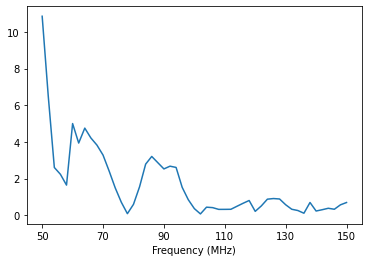

In [23]:
plt.plot(abs(resavg))
labels=(["50", "70", "90", "110", "130", "150"])
plt.xticks([0,10, 20, 30, 40, 50], labels)
plt.xlabel('Frequency (MHz)')

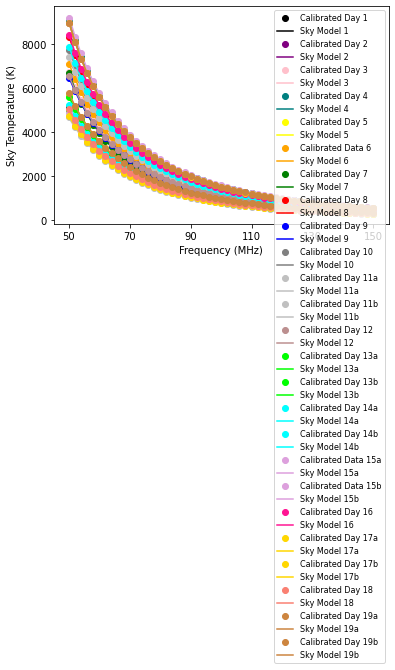

In [24]:
plt.plot(obsavg1, 'o', color='black', label = 'Calibrated Day 1')
plt.plot(y1, color ='black', label= 'Sky Model 1')
plt.plot(obsavg2, 'o',color='purple', label = 'Calibrated Day 2')
plt.plot(y2, color ='purple', label= 'Sky Model 2')
plt.plot(obsavg3, 'o', color='pink', label = 'Calibrated Day 3')
plt.plot(y3, color ='pink', label= 'Sky Model 3')
plt.plot(obsavg4, 'o',color='teal', label = 'Calibrated Day 4')
plt.plot(y4, color ='teal', label= 'Sky Model 4')
plt.plot(obsavg5, 'o',color='yellow', label = 'Calibrated Day 5')
plt.plot(y5, color ='yellow', label= 'Sky Model 5')
plt.plot(obsavg6, 'o', color='orange', label = 'Calibrated Data 6')
plt.plot(y6, color ='orange', label= 'Sky Model 6')
plt.plot(obsavg7, 'o',color='green', label = 'Calibrated Day 7')
plt.plot(y7, color ='green', label= 'Sky Model 7')
plt.plot(obsavg8, 'o',color='red', label = 'Calibrated Day 8')
plt.plot(y8, color ='red', label= 'Sky Model 8')
plt.plot(obsavg9, 'o',color='blue', label = 'Calibrated Day 9')
plt.plot(y9, color ='blue', label= 'Sky Model 9')
plt.plot(obsavg10, 'o',color='grey', label = 'Calibrated Day 10')
plt.plot(y10, color ='grey', label= 'Sky Model 10')
plt.plot(obsavg11a, 'o',color='silver', label = 'Calibrated Day 11a')
plt.plot(y11a, color ='silver', label= 'Sky Model 11a')
plt.plot(obsavg11b, 'o',color='silver', label = 'Calibrated Day 11b')
plt.plot(y11b, color ='silver', label= 'Sky Model 11b')
plt.plot(obsavg12, 'o', color='rosybrown', label = 'Calibrated Day 12')
plt.plot(y12, color ='rosybrown', label= 'Sky Model 12')
plt.plot(obsavg13a, 'o',color='lime', label = 'Calibrated Day 13a')
plt.plot(y13a, color ='lime', label= 'Sky Model 13a')
plt.plot(obsavg13b, 'o',color='lime', label = 'Calibrated Day 13b')
plt.plot(y13b, color ='lime', label= 'Sky Model 13b')
plt.plot(obsavg14a, 'o',color='cyan', label = 'Calibrated Day 14a')
plt.plot(y14a, color ='cyan', label= 'Sky Model 14a')
plt.plot(obsavg14b, 'o',color='cyan', label = 'Calibrated Day 14b')
plt.plot(y14b, color ='cyan', label= 'Sky Model 14b')
plt.plot(obsavg15a, 'o', color='plum', label = 'Calibrated Data 15a')
plt.plot(y15a, color ='plum', label= 'Sky Model 15a')
plt.plot(obsavg15b, 'o', color='plum', label = 'Calibrated Data 15b')
plt.plot(y15b, color ='plum', label= 'Sky Model 15b')
plt.plot(obsavg16a, 'o',color='deeppink', label = 'Calibrated Day 16')
plt.plot(y16a, color ='deeppink', label= 'Sky Model 16')
plt.plot(obsavg17a, 'o',color='gold', label = 'Calibrated Day 17a')
plt.plot(y17a, color ='gold', label= 'Sky Model 17a')
plt.plot(obsavg17b, 'o',color='gold', label = 'Calibrated Day 17b')
plt.plot(y17b, color ='gold', label= 'Sky Model 17b')
plt.plot(obsavg18a, 'o',color='salmon', label = 'Calibrated Day 18')
plt.plot(y18a, color ='salmon', label= 'Sky Model 18')
plt.plot(obsavg19a, 'o',color='peru', label = 'Calibrated Day 19a')
plt.plot(y19a, color ='peru', label= 'Sky Model 19a')
plt.plot(obsavg19b, 'o',color='peru', label = 'Calibrated Day 19b')
plt.plot(y19b, color ='peru', label= 'Sky Model 19b')

plt.ylabel('Sky Temperature (K)')
plt.xlabel('Frequency (MHz)')
labels=(["50", "70", "90", "110", "130", "150"])
plt.xticks([0,10, 20, 30, 40, 50], labels)
plt.legend(loc = 'upper right', prop ={'size': 8})

In [25]:
res1 = obsavg1-y1
res2 = obsavg2-y2
res3 = obsavg3-y3
res4 = obsavg4-y4
res5 = obsavg5-y5
res6 = obsavg6-y6
res7 = obsavg7-y7
res8 = obsavg8-y8
res9 = obsavg9-y9
res10 = obsavg10-y10
res11a = obsavg11a-y11a
res11b = obsavg11b-y11b
res12 = obsavg12-y12
res13a = obsavg13a-y13a
res13b = obsavg13b-y13b
res14a = obsavg14a-y14a
res14b = obsavg14b-y14b
res15a = obsavg15a-y15a
res15b = obsavg15b-y15b
res16a = obsavg16a-y16a
res17a = obsavg17a-y17a
res17b = obsavg17b-y17b
res18a = obsavg18a-y18a
res19a = obsavg19a-y19a
res19b = obsavg19b-y19b
reslist = [abs(res1), abs(res2), abs(res3), abs(res4), abs(res5), abs(res6), abs(res7), abs(res8), abs(res9), abs(res10), abs(res11a), abs(res11b), abs(res12), abs(res13a), abs(res13b), abs(res14a), abs(res14b), abs(res15a), abs(res15b), abs(res16a), abs(res17a), abs(res17b), abs(res18a), abs(res19a), abs(res19b)]
resavg = np.average(reslist, axis=0)
#alldays = day1.shape[0] + day2.shape[0] + day3.shape[0] + day4.shape[0] + day5.shape[0] + day6.shape[0] + day7.shape[0] + day8.shape[0] + day9.shape[0]+ day10.shape[0] + day11.shape[0] +  + day12.shape[0] + day13.shape[0]+ day14.shape[0] + day15.shape[0]+ day16.shape[0] + day17.shape[0] + day18.shape[0] + day19.shape[0]
#weights = [day1.shape[0]/alldays, day2.shape[0]/alldays, day3.shape[0]/alldays, day4.shape[0]/alldays, day5.shape[0]/alldays, day6.shape[0]/alldays, day7.shape[0]/alldays, day8.shape[0]/alldays, day9.shape[0]/alldays, day10.shape[0]/alldays, day11.shape[0]/alldays, day12.shape[0]/alldays, day13.shape[0]/alldays, day14.shape[0]/alldays, day15.shape[0]/alldays, day16.shape[0]/alldays, day17.shape[0]/alldays, day18.shape[0]/alldays, day19.shape[0]/alldays]
#resavgw = np.average(reslist, axis=0, weights=weights)

In [26]:
#variance
err = (((abs(res1)-resavg)**2 + (abs(res2)-resavg)**2 + (abs(res3)-resavg)**2 + (abs(res4)-resavg)**2 + (abs(res5)-resavg)**2 + (abs(res6)-resavg)**2 + (abs(res7)-resavg)**2 + (abs(res8)-resavg)**2 +(abs(res9)-resavg)**2 + (abs(res10)-resavg)**2 + (abs(res11a)-resavg)**2 + (abs(res11b)-resavg)**2 + (abs(res12)-resavg)**2 + (abs(res13a)-resavg)**2 + (abs(res13b)-resavg)**2 + (abs(res14a)-resavg)**2 + (abs(res14b)-resavg)**2 + (abs(res15a)-resavg)**2 + (abs(res15b)-resavg)**2 + (abs(res16a)-resavg)**2 + (abs(res17a)-resavg)**2 + (abs(res17b)-resavg)**2 + (abs(res18a)-resavg)**2 + (abs(res19a)-resavg)**2 + (abs(res19b)-resavg)**2)/25)**0.5


In [70]:
#variance with weighted average
#errw = (((abs(res1)-resavgw)**2 + (abs(res2)-resavgw)**2 + (abs(res3)-resavgw)**2 + (abs(res4)-resavgw)**2 + (abs(res5)-resavgw)**2 + (abs(res6)-resavgw)**2 + (abs(res7)-resavgw)**2+ (abs(res8)-resavgw)**2 + (abs(res8)-resavgw)**2)/9)**0.5

In [27]:
v = []
for j in range(50, 152, 2):
    v.append(j)

([<matplotlib.axis.XTick at 0x1d921cf50>,
 [Text(50, 0, '50'),
  Text(70, 0, '70'),
  Text(90, 0, '90'),
  Text(110, 0, '110'),
  Text(130, 0, '130'),
  Text(150, 0, '150')])

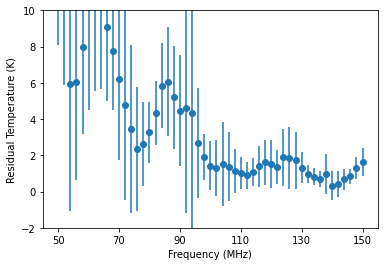

In [28]:
#plt.scatter(v, resavg)
plt.errorbar(v,resavg,yerr=err, fmt="o")
#plt.errorbar(v,resavgw,yerr=errw)
plt.ylim([-2,10])
#plt.xlim([5,50])
plt.ylabel('Residual Temperature (K)')
plt.xlabel('Frequency (MHz)')
labels=(["50", "70", "90", "110", "130", "150"])
plt.xticks([50, 70, 90, 110, 130, 150], labels)

([<matplotlib.axis.XTick at 0x1993d0b50>,
 [Text(0, 0, '50'),
  Text(10, 0, '70'),
  Text(20, 0, '90'),
  Text(30, 0, '110'),
  Text(40, 0, '130'),
  Text(50, 0, '150')])

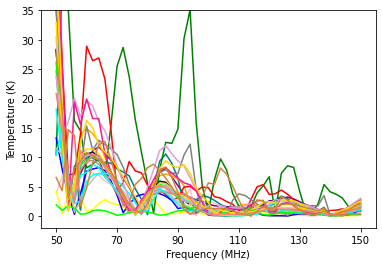

In [29]:
plt.plot(abs(res1), color = 'black')
plt.plot(abs(res2), color='purple')
plt.plot(abs(res3), color='pink')
plt.plot(abs(res4), color='teal')
plt.plot(abs(res5), color='yellow')
plt.plot(abs(res6), color='orange')
plt.plot(abs(res7), color='green')
plt.plot(abs(res8), color='red')
plt.plot(abs(res9), color='blue')
plt.plot(abs(res10), color='grey')
plt.plot(abs(res11a), color='silver')
plt.plot(abs(res11b), color='silver')
plt.plot(abs(res12), color='rosybrown')
plt.plot(abs(res13a), color='lime')
plt.plot(abs(res13b), color='lime')
plt.plot(abs(res14a), color='cyan')
plt.plot(abs(res14b), color='cyan')
plt.plot(abs(res15a), color='plum')
plt.plot(abs(res15b), color='plum')
plt.plot(abs(res16a), color='deeppink')
plt.plot(abs(res17a), color='gold')
plt.plot(abs(res17b), color='gold')
plt.plot(abs(res18a), color='salmon')
plt.plot(abs(res19a), color='peru')
plt.plot(abs(res19b), color='peru')
plt.ylim([-2,35])
#plt.xlim([1,50])
plt.ylabel('Temperature (K)')
plt.xlabel('Frequency (MHz)')
labels=(["50", "70", "90", "110", "130", "150"])
plt.xticks([0,10, 20, 30, 40, 50], labels)